In [4]:
import sys
import snap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(sys.version)

2.7.10 (default, Oct  6 2017, 22:29:07) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]


In [94]:
year = 2010
#filename = 
df = pd.read_csv("./ca_od_main_JT01_"+str(year)+".csv")

In [6]:
df.columns

Index([u'w_geocode', u'h_geocode', u'S000', u'SA01', u'SA02', u'SA03', u'SE01',
       u'SE02', u'SE03', u'SI01', u'SI02', u'SI03', u'createdate'],
      dtype='object')

In [8]:
df.head()
df.sum()

w_geocode     930926994571744954
h_geocode     933343385723491599
S000                    14448147
SA01                     3100658
SA02                     8144634
SA03                     3202855
SE01                     2629410
SE02                     4803767
SE03                     7014970
SI01                     2253449
SI02                     2731953
SI03                     9462745
createdate       270649215761767
dtype: int64

In [95]:
df['S000'].value_counts()

1      11580221
2        452100
3         87700
4         29915
5         13339
6          6905
7          3932
8          2446
9          1651
10         1100
11          762
12          527
13          401
14          321
15          248
16          184
17          170
18          121
19          119
20           83
21           74
22           57
23           53
24           40
25           33
26           27
29           23
28           21
30           21
27           20
         ...   
58            2
56            2
37            2
50            2
111           1
87            1
110           1
106           1
112           1
103           1
119           1
102           1
101           1
94            1
160           1
90            1
49            1
83            1
82            1
76            1
75            1
74            1
70            1
66            1
64            1
62            1
57            1
53            1
176           1
200           1
Name: S000, Length: 92, 

In [18]:
census_block_indeg_dict = {}

for index, row in df.iterrows():
    if row['w_geocode'] in census_block_indeg_dict.keys():
        census_block_indeg_dict[row['w_geocode']] += row['S000']
    else:
        census_block_indeg_dict[row['w_geocode']] = row['S000']
    if index % 100000 == 0:
        print index

0
100000
200000


KeyboardInterrupt: 

In [19]:
df_xwalk = pd.read_csv('./ca_xwalk.csv')

/Users/gardner49/Documents/Other/Stanford/CS224W/PROJECT/env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (27,28,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df_xwalk.head()

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,60014001001000,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,99999,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.879141,-122.232623,20170919
1,60014001001001,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,99999,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.881846,-122.234076,20170919
2,60014001001002,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,99999,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.880514,-122.229373,20170919
3,60014001001003,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,99999,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.883119,-122.239007,20170919
4,60014001001004,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,99999,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.882906,-122.238381,20170919


In [21]:
df_xwalk['ctyname'].value_counts()

Los Angeles County, CA        109587
San Bernardino County, CA      48173
San Diego County, CA           43415
Orange County, CA              36873
Riverside County, CA           35720
Kern County, CA                35280
Alameda County, CA             23956
Santa Clara County, CA         22369
Fresno County, CA              22096
Sacramento County, CA          19939
Contra Costa County, CA        18309
Ventura County, CA             14856
Tulare County, CA              13796
San Joaquin County, CA         13239
San Luis Obispo County, CA     11428
Monterey County, CA            10601
Shasta County, CA              10564
Sonoma County, CA              10389
Santa Barbara County, CA       10370
Solano County, CA              10282
Siskiyou County, CA            10152
Humboldt County, CA             9697
San Mateo County, CA            9260
Placer County, CA               9162
Imperial County, CA             8875
Stanislaus County, CA           8544
Mendocino County, CA            8235
S

In [23]:
bay_counties = ['San Francisco County, CA', 'Marin County, CA', 'Alameda County, CA', 'Santa Clara County, CA', 'Contra Costa County, CA', 'San Mateo County, CA']

df_bay = df_xwalk.loc[df_xwalk['ctyname'].isin(bay_counties)]

len(df_bay.index)

85786

In [26]:
df_bay = df_bay[['tabblk2010', 'ctyname']]

df_bay.head()
df_bay.columns
df_bay['tabblk2010']

Index([u'tabblk2010', u'ctyname'], dtype='object')

In [96]:
df_bay = df_bay.rename(index=str, columns={"tabblk2010": "w_geocode"})
df_bay.columns
df.columns
result = pd.merge(df, df_bay, on='w_geocode')

In [97]:
result.head()
len(result.index)

2415083

In [98]:
census_block_indeg_dict = {}

for index, row in result.iterrows():
    if row['w_geocode'] in census_block_indeg_dict.keys():
        census_block_indeg_dict[row['w_geocode']] += row['S000']
    else:
        census_block_indeg_dict[row['w_geocode']] = row['S000']
    if index % 100000 == 0:
        print index

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000


(array([3.8328e+04, 1.0000e+02, 2.6000e+01, 1.2000e+01, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 2.28890e+03, 4.57680e+03, 6.86470e+03, 9.15260e+03,
        1.14405e+04, 1.37284e+04, 1.60163e+04, 1.83042e+04, 2.05921e+04,
        2.28800e+04]),
 <a list of 10 Patch objects>)

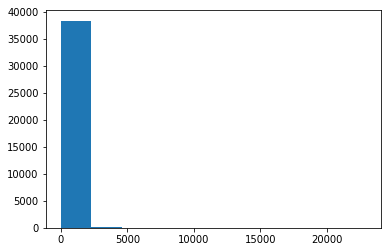

In [43]:
import matplotlib.pyplot as plt
plt.hist(census_block_indeg_dict.values())

In [100]:
df_bay_counts = df_xwalk.loc[df_xwalk['ctyname'].isin(bay_counties)]

indeg_df = pd.DataFrame.from_dict(census_block_indeg_dict, orient='index')
indeg_df['tabblk2010'] = indeg_df.index
indeg_df = indeg_df.rename(index=str, columns={0: "indeg"})
indeg_df.head()
#indeg_df.columns

result = pd.merge(df, df_bay, on='w_geocode')
print len(indeg_df.index)
print len(df_bay_counts.index)
df_bay_counts = pd.merge(df_bay_counts, indeg_df, on='tabblk2010', how='left')
print len(df_bay_counts.index)
df_bay_counts.head()
print df_bay_counts['indeg'].isna().sum()
df_bay_counts['indeg'].fillna(0, inplace=True)
print df_bay_counts['indeg'].isna().sum()

   

43838
85786
85786
41948
0


In [101]:
df_bay_counts.to_csv('bay_xwalk_indeg'+str(year)+'.csv')

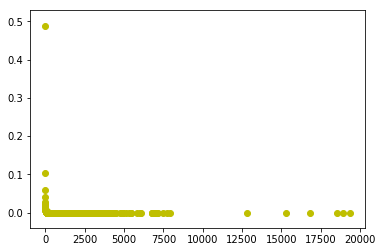

In [103]:

degrees = np.asarray(df_bay_counts['indeg'].tolist())

values, counts = np.unique(degrees, return_counts=True)
X = values.tolist()
normCounts = np.true_divide(counts, np.sum(counts))
Y = normCounts.tolist()
plt.scatter(X, Y, color = 'y', label = 'indeg fequency log-scale')

In [75]:
census_block_outdeg_dict = {}

for index, row in result.iterrows():
    if row['S000'] == 0:
        continue
    if row['h_geocode'] in census_block_outdeg_dict.keys():
        census_block_outdeg_dict[row['h_geocode']] += row['S000']
    else:
        census_block_outdeg_dict[row['h_geocode']] = row['S000']
    if index % 100000 == 0:
        print index

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000


In [79]:

outdeg_df = pd.DataFrame.from_dict(census_block_outdeg_dict, orient='index')
outdeg_df['tabblk2010'] = outdeg_df.index
outdeg_df = outdeg_df.rename(index=str, columns={0: "outdeg"})
outdeg_df.head()




,outdeg,tabblk2010
60379203371009,3,60379203371009
60379203371013,2,60379203371013
60379203371014,2,60379203371014
60650426191000,3,60650426191000
60610210431004,23,60610210431004


In [81]:
print len(outdeg_df.index)
print len(df_bay_counts.index)
df_bay_counts1 = pd.merge(df_bay_counts, outdeg_df, on='tabblk2010', how='left')
print len(df_bay_counts1.index)
df_bay_counts1.head()
print df_bay_counts1['outdeg'].isna().sum()
df_bay_counts1['outdeg'].fillna(0, inplace=True)
print df_bay_counts1['outdeg'].isna().sum()

203086
85786
85786
31685
0


In [83]:
df_bay_counts1.head()

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate,indeg,outdeg
0,60014001001000,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.879141,-122.232623,20170919,0.0,0.0
1,60014001001001,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.881846,-122.234076,20170919,0.0,0.0
2,60014001001002,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.880514,-122.229373,20170919,0.0,0.0
3,60014001001003,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.883119,-122.239007,20170919,0.0,0.0
4,60014001001004,6,CA,California,6001,"Alameda County, CA",6001400100,"4001 (Alameda, CA)",60014001001,"1 (Tract 4001, Alameda, CA)",...,NaN,9999999999999999999999,NaN,6000003,03 Oakland City WIB,37.882906,-122.238381,20170919,0.0,0.0


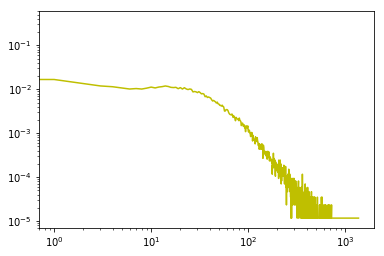

In [89]:
degrees = np.asarray(df_bay_counts1['outdeg'].tolist())

values, counts = np.unique(degrees, return_counts=True)
X = values.tolist()
normCounts = np.true_divide(counts, np.sum(counts))
Y = normCounts.tolist()
plt.loglog(X, Y, color = 'y', label = 'outdeg fequency log-scale')

In [91]:
df_bay_counts1.to_csv('bay_xwalk_indeg_out.csv')

Text(0,0.5,'frequency')

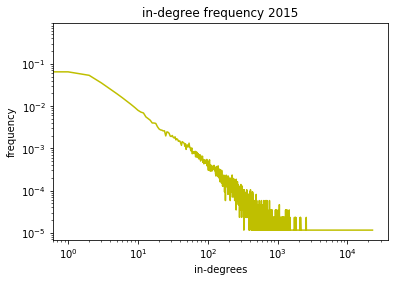

In [14]:
df = pd.read_csv('bay_xwalk_indeg_outdeg_2015.csv')

degrees = np.asarray(df['indeg'].tolist())

values, counts = np.unique(degrees, return_counts=True)
X = values.tolist()
normCounts = np.true_divide(counts, np.sum(counts))
Y = normCounts.tolist()
plt.loglog(X, Y, color = 'y', label = 'indeg fequency log-scale')
plt.title('in-degree frequency 2015')
plt.xlabel('in-degrees')
plt.ylabel('frequency')



Text(0,0.5,'frequency')

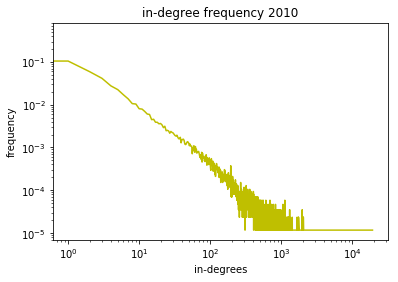

In [15]:
df = pd.read_csv('bay_xwalk_indeg_2010.csv')
degrees = np.asarray(df['indeg'].tolist())

values, counts = np.unique(degrees, return_counts=True)
X = values.tolist()
normCounts = np.true_divide(counts, np.sum(counts))
Y = normCounts.tolist()
plt.loglog(X, Y, color = 'y', label = 'indeg fequency log-scale')
plt.title('in-degree frequency 2010')
plt.xlabel('in-degrees')
plt.ylabel('frequency')


Text(0,0.5,'frequency')

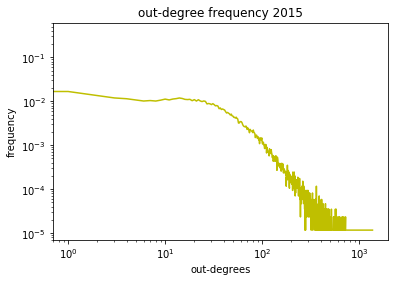

In [13]:
degrees = np.asarray(df['outdeg'].tolist())

values, counts = np.unique(degrees, return_counts=True)
X = values.tolist()
normCounts = np.true_divide(counts, np.sum(counts))
Y = normCounts.tolist()
plt.loglog(X, Y, color = 'y', label = 'outdeg fequency log-scale')
plt.title('out-degree frequency 2015')
plt.xlabel('out-degrees')
plt.ylabel('frequency')